# *Predicting prices of Airbnb's*

In [219]:
#Importing all the libraries 
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

matplotlib.style.use('ggplot')
%matplotlib inline

In [139]:
#Loading the data
listings_og = pd.read_csv("/Users/dhruvkhandelwal/Downloads/Airbnb/listings.csv",encoding = 'utf-8')

In [140]:
#Listing the original dataset
listings_og=listings_og.set_index('id')

In [141]:
#Listing the data types of the columns
listings_og.dtypes

listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                       float64
medium_url                          float64
picture_url                          object
xl_picture_url                      float64
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                   

In [142]:
listings_og

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
6422,https://www.airbnb.com/rooms/6422,20181115003058,2018-11-15,Nashville Charm,"Turn of century bungalow in historic, hip East...",1920 historic bungalow backs up to city park w...,"Turn of century bungalow in historic, hip East...",none,Historic East Nashville is home to many new an...,We believe in radical hospitality which is why...,...,f,NaN,"{""Tennessee State""}",f,f,strict_14_with_grace_period,f,f,1,4.67
20847,https://www.airbnb.com/rooms/20847,20181115003058,2018-11-15,East Nashville Retro Ranch!,Retro Ranch is nestled in the eclectic East si...,-Retro Ranch is nestled in a quiet part of Sou...,Retro Ranch is nestled in the eclectic East si...,none,"Many local favorites, including live music, th...","If you run, walk or bike, there is a lovely pa...",...,f,NaN,"{""Tennessee State""}",f,f,strict_14_with_grace_period,t,t,3,1.32
25341,https://www.airbnb.com/rooms/25341,20181115003058,2018-11-15,East Nashville Retro Ranch BR #2,Retro Ranch is nestled in the eclectic East si...,-Retro Ranch is nestled in a quiet part of Sou...,Retro Ranch is nestled in the eclectic East si...,none,"Many local favorites, including live music, th...","If you run, walk or bike, there is a lovely pa...",...,f,NaN,"{""Tennessee State""}",f,f,strict_14_with_grace_period,t,t,3,0.97
25342,https://www.airbnb.com/rooms/25342,20181115003058,2018-11-15,East Nashville Retro Ranch BR #3,Retro Ranch is nestled in the eclectic East si...,-Retro Ranch is nestled in a quiet part of Sou...,Retro Ranch is nestled in the eclectic East si...,none,"Many local favorites, including live music, th...","If you run, walk or bike, there is a lovely pa...",...,f,NaN,"{""Tennessee State""}",f,f,strict_14_with_grace_period,t,t,3,0.05
25613,https://www.airbnb.com/rooms/25613,20181115003058,2018-11-15,108 Year Old East Nashville Home,"Lovely large Craftsman home. Art, architecture...","Our gorgeous 3,000 square foot, architecturall...","Lovely large Craftsman home. Art, architecture...",none,We live in a walkable neighborhood with sidewa...,We have taken visitors with us to musical even...,...,f,NaN,"{""Tennessee State""}",t,f,moderate,t,t,1,4.29
37306,https://www.airbnb.com/rooms/37306,20181115003058,2018-11-15,8th South Private Room&Bath - Female(s)/F+M Only,Renting again after taking a 1.5 year break. P...,Thank you for considering my home for your Nas...,Renting again after taking a 1.5 year break. P...,none,"I'm in Woodland-in-Waverly, the oldest survivi...",NaN,...,f,NaN,"{""Tennessee State""}",f,f,strict_14_with_grace_period,t,t,1,0.99
39870,https://www.airbnb.com/rooms/39870,20181115003058,2018-11-15,Close to Vanderbilt 2,This is a room in my cozy cottage near Vanderb...,Quiet house walking distance to Vanderbilt Uni...,This is a room in my cozy cottage near Vanderb...,none,"The house is in a safe, quiet, ""college"" neig...",NaN,...,f,NaN,"{""Tennessee State""}",f,f,moderate,f,f,2,5.01
72906,https://www.airbnb.com/rooms/72906,20181115003058,2018-11-15,Vandy/Belmont/10 mins to Broadway - Sunny 800 ...,Entire top floor. Private. 800 sq ft of bright...,Please note that though this space is very clo...,Entire top floor. Private. 800 sq ft of bright...,none,Historic Belmont-Hillsboro neighborhood. Walk-...,"If you want to go to the Bluebird Cafe, the ea...",...,f,NaN,"{""Tennessee State""}",f,f,flexible,f,f,1,5.56
80410,https://www.airbnb.com/rooms/80410,20181115003058,2018-11-15,Historic East Nashville 1906 with Hot Tub!,NaN,Private Room (Queen Bed) with Hallway Bathroom...,Private Room (Queen Bed) with Hallway Bathroom...,none,"Super friendly, lots of sidewalks, dogs, cats ...",NaN,...,f,NaN,"{""Tennessee State"

In [143]:
#Checking the statistics of the columns
listings_og.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
scrape_id,5921.0,2.018112e+13,1.699362e+00,2.018112e+13,2.018112e+13,2.018112e+13,2.018112e+13,2.018112e+13
thumbnail_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medium_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xl_picture_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,5921.0,7.049511e+07,5.902279e+07,6.383000e+03,1.859075e+07,5.608142e+07,1.143534e+08,2.257066e+08
host_acceptance_rate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_listings_count,5921.0,1.191469e+02,3.818186e+02,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+01,2.491000e+03
host_total_listings_count,5921.0,1.191469e+02,3.818186e+02,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+01,2.491000e+03
neighbourhood,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
#Creating another dataframe to work on
listings=listings_og

In [145]:
#Converting price to a float
listings['price'] = listings['price'].str.replace('$', '')
listings['price'] = listings['price'].str.replace(',', '').astype('float64')

price                             1.000000e+00
bathrooms                         4.153558e-01
accommodates                      4.078474e-01
beds                              3.834217e-01
bedrooms                          3.828613e-01
calculated_host_listings_count    1.759941e-01
availability_365                  1.649774e-01
guests_included                   1.512305e-01
host_total_listings_count         1.366105e-01
host_listings_count               1.366105e-01
availability_60                   8.383528e-02
availability_90                   7.615036e-02
availability_30                   7.605150e-02
review_scores_rating              6.845128e-02
review_scores_location            3.199886e-02
review_scores_cleanliness         2.129769e-02
maximum_nights                    7.038576e-03
host_id                           4.873532e-03
latitude                          1.321668e-03
scrape_id                        -7.991245e-17
minimum_nights                   -1.123301e-02
review_scores

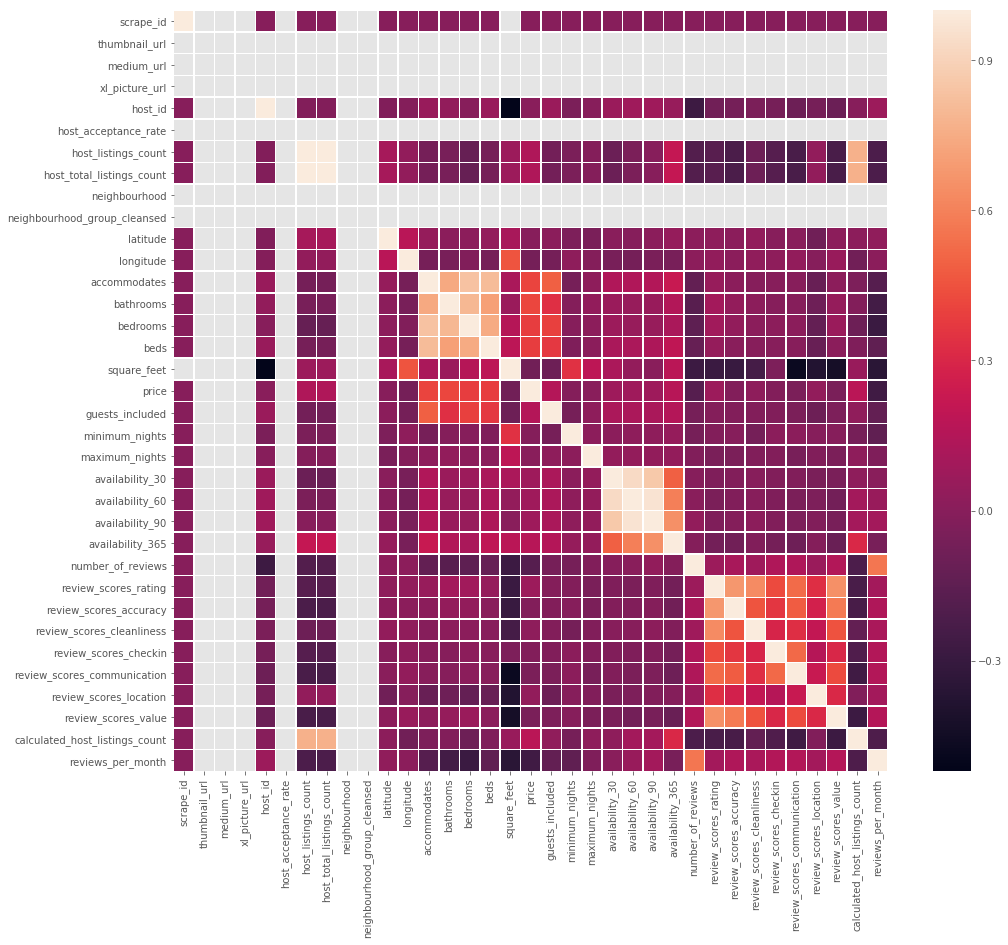

In [146]:
#Correlation Matrix to see the most correlated features with price
fig, ax = plt.subplots(figsize=(16,14))
corr = listings.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, linewidths=.5, ax=ax)
corr['price'].sort_values(ascending=False)

In [147]:
#Based on the above correlations and a sense test, we select the follwing features for our models
listings.head()
selected_columns = [
                'id',
                'host_response_rate',
                'host_is_superhost',
                'zipcode',
                'property_type',
                'room_type',
                'accommodates',
                'bathrooms',
                'bedrooms',
                'beds',
                'bed_type',
                'amenities',
                'price',
                'guests_included',
                'review_scores_rating',
                'review_scores_accuracy',
                'review_scores_cleanliness',
                'review_scores_checkin',
                'review_scores_communication',
                'review_scores_location',
                'review_scores_value'
]

listings.drop( 
    [key for key in listings.keys() if key not in selected_columns] ,
    axis=1, 
    inplace=True)

#Since amenities is a textual feature, and we know longer the amenities means more the amenities which should be directly correlated to the price. So calculating the length of the amenities
listings.loc[:,'amenities_length'] = listings['amenities'].str.len()

#Dropping the original amenities column
listings = listings.drop(['amenities'], 1)

### Scoring reviews based on text analysis

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
nltk.download('vader_lexicon')
from ipykernel import kernelapp as app
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

reviews = pd.read_csv("/Users/dhruvkhandelwal/Downloads/Airbnb/reviews.csv")
reviews  = reviews.dropna()
reviews.head()
reviews=reviews.set_index('listing_id')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dhruvkhandelwal/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

reviews['polarity_value']="Default"
reviews['neg']=0.0
reviews['pos']=0.0
reviews['neu']=0.0
reviews['compound']=0.0
for index,row in reviews.iterrows():
    ss = sid.polarity_scores(row['comments'])
    reviews.set_value(index,'polarity_value',ss)
    reviews.set_value(index,'neg',ss['neg'])
    reviews.set_value(index,'pos',ss['pos'])
    reviews.set_value(index,'neu',ss['neu'])
    reviews.set_value(index,'compound',ss['compound'])


/Users/dhruvkhandelwal/anaconda3/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
/Users/dhruvkhandelwal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/Users/dhruvkhandelwal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/Users/dhruvkhandelwal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del

In [148]:
reviews.head()

,id,date,reviewer_id,reviewer_name,comments,polarity_value,neg,pos,neu,compound
listing_id,,,,,,,,,,
6422,1927,2009-04-30,14100,Melissa,I can't say enough about how wonderful it was ...,"{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'comp...",0.0,0.207,0.793,0.8999
6422,3867,2009-06-11,17413,Raquel,Michelle and Collier's home is wonderful! They...,"{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'comp...",0.0,0.207,0.793,0.8999
6422,4159,2009-06-17,20253,Ulrike,I spent one night at Michele's home and felt j...,"{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'comp...",0.0,0.207,0.793,0.8999
6422,5724,2009-07-18,22544,Phil,Michele and Collier are two of the loveliest p...,"{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'comp...",0.0,0.207,0.793,0.8999
6422,11891,2009-09-29,33409,Claire,We had the most lovely time staying with Miche...,"{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'comp...",0.0,0.207,0.793,0.8999


In [149]:
rscore=reviews.groupby('listing_id')['compound'].mean()

In [150]:
rscore

listing_id
6422        0.8999
20847       0.9657
25341       0.9670
25342       0.9877
25613       0.9853
37306       0.9735
39870       0.7184
72906       0.9048
80410       0.6249
125579      0.9245
136015      0.9673
168097      0.9386
258817      0.9214
280842      0.9803
289242      0.9259
319705      0.9421
325560      0.9617
329997      0.9636
340081      0.9565
366339      0.9207
371066      0.9719
395889      0.9758
421290      0.9636
430052      0.9186
431258      0.8854
475134      0.9468
479100      0.9530
491172      0.9168
501570      0.8860
513664      0.9859
             ...  
29492548    0.8395
29492978    0.9773
29494500    0.9652
29496560    0.6892
29507969    0.9538
29508873    0.8550
29515083    0.0000
29517989    0.9039
29518010    0.6588
29518029    0.6369
29518093    0.4754
29518171    0.6249
29518255    0.9729
29543248    0.9861
29562185    0.7070
29569012    0.6588
29570357    0.4404
29571330    0.6588
29585120    0.8633
29586592    0.9197
29586993    0.7249
2

### Merging the dataframes

In [183]:
#Joining the two dataframes by ID 
listings_final = pd.concat([listings, rscore], axis=1, join='inner')


In [184]:
listings_final

,host_response_rate,host_is_superhost,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,...,guests_included,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,amenities_length,compound
6422,NaN,t,37206,House,Private room,2,1.0,2,3.0,Real Bed,...,1,99.0,10.0,10.0,10.0,10.0,10.0,10.0,613,0.8999
20847,100%,t,37216,House,Private room,2,1.0,1,1.0,Real Bed,...,1,94.0,9.0,10.0,9.0,10.0,9.0,9.0,703,0.9657
25341,100%,t,37216,House,Private room,2,1.0,1,2.0,Real Bed,...,1,96.0,10.0,10.0,10.0,10.0,9.0,9.0,814,0.9670
25342,100%,t,37216,House,Private room,2,1.0,1,1.0,Real Bed,...,1,93.0,10.0,10.0,10.0,10.0,9.0,9.0,725,0.9877
25613,100%,t,37206,House,Private room,2,1.0,1,1.0,Real Bed,...,1,97.0,10.0,10.0,10.0,10.0,10.0,10.0,356,0.9853
37306,100%,f,37204,House,Private room,2,1.0,1,1.0,Real Bed,...,1,99.0,10.0,10.0,10.0,10.0,10.0,10.0,381,0.9735
39870,100%,t,37212,House,Private room,2,1.0,1,1.0,Real Bed,...,1,98.0,10.0,10.0,10.0,10.0,10.0,10.0,309,0.7184
72906,NaN,t,37212,Apartment,Entire home/apt,4,1.0,2,3.0,Real Bed,...,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,392,0.9048
80410,100%,t,37206,House,Private room,2,1.0,1,1.0,Real Bed,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,400,0.6249
125579,100%,f,37204,House,Entire home/apt,8,2.0,3,3.0,Real Bed,...,4,94.0,10.0,10.0,10.0,10.0,10.0,10.0,608,0.9245


In [185]:
#Converting the true/false values to binary 0/1
listings_final['host_is_superhost'].replace('t',1, inplace=True)
listings_final['host_is_superhost'].replace('f',0, inplace=True)

#Converting acceptance/response percentages to numbers
listings_final['host_response_rate'] = listings_final['host_response_rate'].replace('%','',regex=True).astype('float64')/100.00


In [187]:
#Recoding property_type values 
def recode(value):
    if value not in ['House', 'Apartment', 'Touwnhouse', 'Condominium']:
        return 'Other'
    return value

listings_final['property_type'] = listings_final['property_type'].apply(recode)

In [188]:
#Recoding bed_type values
def recode(value):
    if value not in ['Real Bed']:
        return 'Other'
    return value

listings_final['bed_type'] = listings_final['bed_type'].apply(recode)

In [190]:
#Filling the empty values in the columns
listings_final['bathrooms'].fillna(method='ffill', inplace=True)
listings_final['bedrooms'].fillna(method='ffill', inplace=True)
listings_final['beds'].fillna(method='ffill', inplace=True)
listings_final['host_is_superhost'].fillna(value=0,inplace=True)
listings_final['host_response_rate'].fillna(value=0,inplace=True)

In [192]:
listings_final

,host_response_rate,host_is_superhost,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,...,guests_included,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,amenities_length,compound
6422,0.00,1,37206,House,Private room,2,1.0,2,3.0,Real Bed,...,1,99.0,10.0,10.0,10.0,10.0,10.0,10.0,613,0.8999
20847,1.00,1,37216,House,Private room,2,1.0,1,1.0,Real Bed,...,1,94.0,9.0,10.0,9.0,10.0,9.0,9.0,703,0.9657
25341,1.00,1,37216,House,Private room,2,1.0,1,2.0,Real Bed,...,1,96.0,10.0,10.0,10.0,10.0,9.0,9.0,814,0.9670
25342,1.00,1,37216,House,Private room,2,1.0,1,1.0,Real Bed,...,1,93.0,10.0,10.0,10.0,10.0,9.0,9.0,725,0.9877
25613,1.00,1,37206,House,Private room,2,1.0,1,1.0,Real Bed,...,1,97.0,10.0,10.0,10.0,10.0,10.0,10.0,356,0.9853
37306,1.00,0,37204,House,Private room,2,1.0,1,1.0,Real Bed,...,1,99.0,10.0,10.0,10.0,10.0,10.0,10.0,381,0.9735
39870,1.00,1,37212,House,Private room,2,1.0,1,1.0,Real Bed,...,1,98.0,10.0,10.0,10.0,10.0,10.0,10.0,309,0.7184
72906,0.00,1,37212,Apartment,Entire home/apt,4,1.0,2,3.0,Real Bed,...,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,392,0.9048
80410,1.00,1,37206,House,Private room,2,1.0,1,1.0,Real Bed,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,400,0.6249
125579,1.00,0,37204,House,Entire home/apt,8,2.0,3,3.0,Real Bed,...,4,94.0,10.0,10.0,10.0,10.0,10.0,10.0,608,0.9245


In [193]:
listings_final.isna().sum()

host_response_rate              0
host_is_superhost               0
zipcode                        34
property_type                   0
room_type                       0
accommodates                    0
bathrooms                       0
bedrooms                        0
beds                            0
bed_type                        0
price                           0
guests_included                 0
review_scores_rating           21
review_scores_accuracy         23
review_scores_cleanliness      21
review_scores_checkin          26
review_scores_communication    21
review_scores_location         26
review_scores_value            29
amenities_length                0
compound                        0
dtype: int64

/Users/dhruvkhandelwal/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


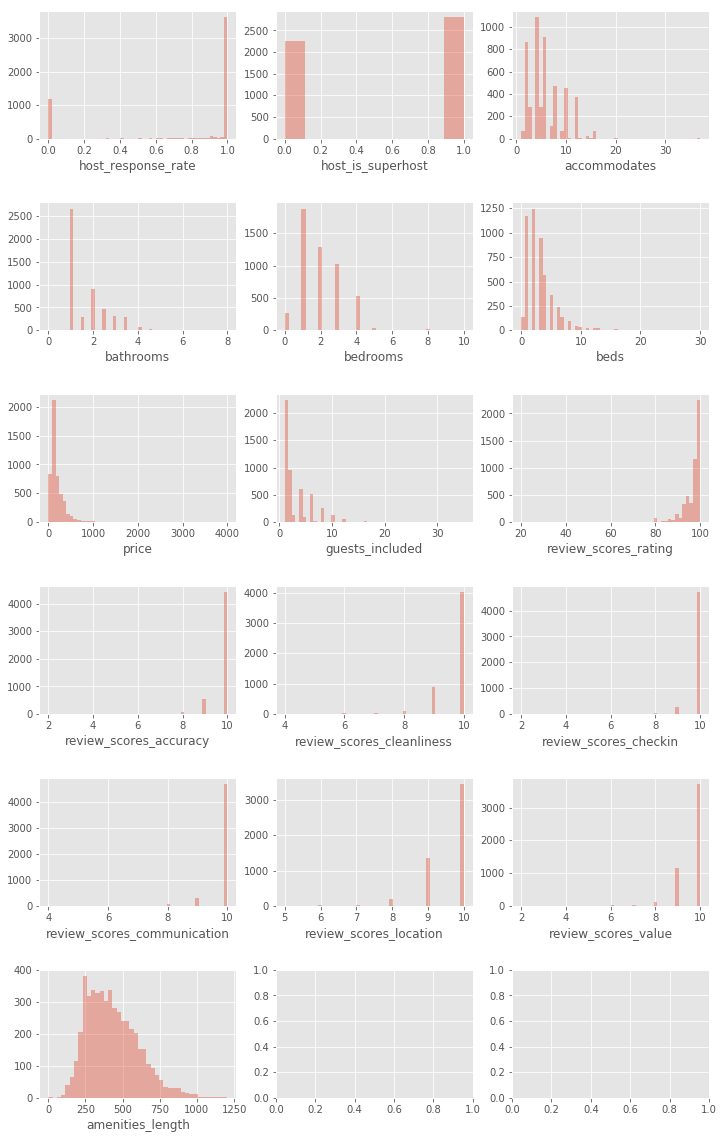

In [195]:
#Creating distribution charts for all the numbered features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numdf = listings_final.select_dtypes(include=numerics)
numdf = numdf.dropna(axis=0, how='any')
numdf_variables = list(numdf)

graphs = len(numdf_variables)-1

position = []
for i in range(6):
    for j in range(3):
        b = i,j
        position.append(b)
        
fig, axes = plt.subplots(nrows=6, ncols=3, sharey=False, sharex=False, figsize=(12,20))
fig.subplots_adjust(hspace=.5)

for i in range(graphs):
    sns.distplot(numdf[numdf_variables[i]], ax=axes[position[i]], kde=False)


price                          1.000000
accommodates                   0.516892
bathrooms                      0.510416
bedrooms                       0.475249
beds                           0.444214
guests_included                0.243550
review_scores_rating           0.068486
review_scores_location         0.032106
host_response_rate             0.026244
amenities_length               0.025995
review_scores_cleanliness      0.021253
compound                       0.012285
host_is_superhost              0.008618
review_scores_accuracy        -0.019426
review_scores_checkin         -0.021469
review_scores_communication   -0.040487
review_scores_value           -0.045858
Name: price, dtype: float64

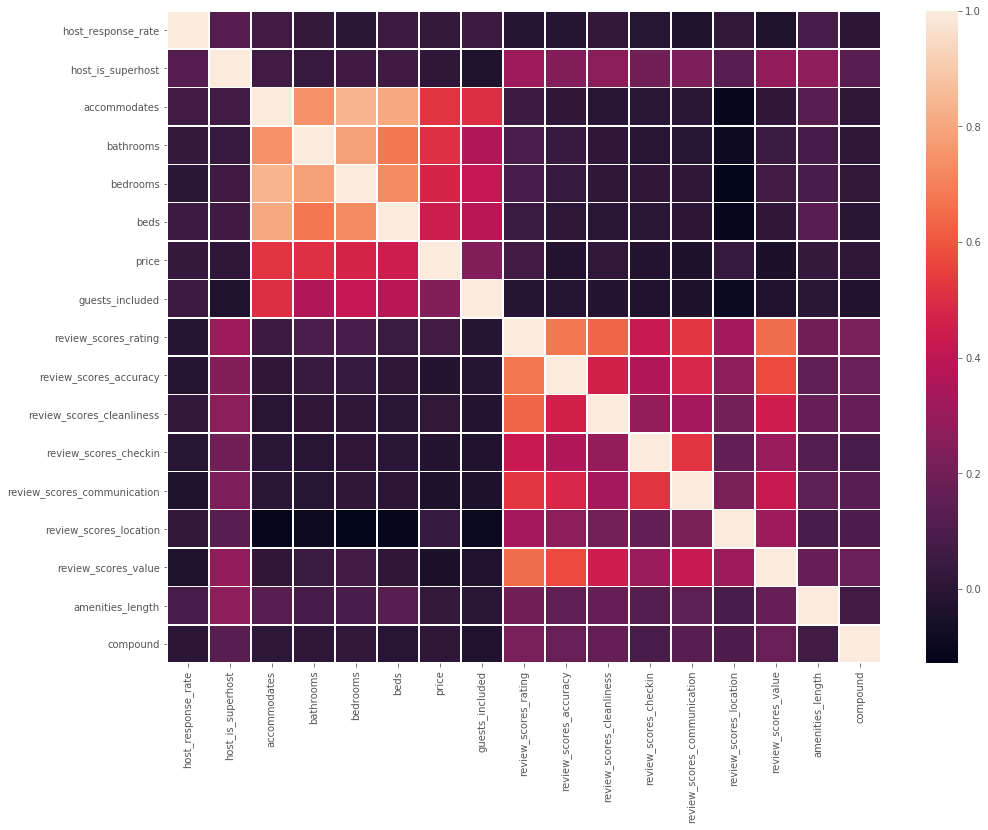

In [197]:
#Correlation Matrix with the remaining features
fig, ax = plt.subplots(figsize=(16,12))
corr = listings_final.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, linewidths=.5, ax=ax)
corr['price'].sort_values(ascending=False)

In [199]:
#Creating columns for the categorical fields
listings_final = pd.get_dummies(listings_final, columns=['zipcode','property_type', 'room_type', 'bed_type'])


In [200]:
listings_final.dtypes

host_response_rate             float64
host_is_superhost                int64
accommodates                     int64
bathrooms                      float64
bedrooms                         int64
beds                           float64
price                          float64
guests_included                  int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
amenities_length                 int64
compound                       float64
zipcode_\n                       uint8
zipcode_37013                    uint8
zipcode_37015                    uint8
zipcode_37027                    uint8
zipcode_37072                    uint8
zipcode_37076                    uint8
zipcode_37080                    uint8
zipcode_37115                    uint8
zipcode_37138            

price                          1.000000
accommodates                   0.516892
bathrooms                      0.510416
bedrooms                       0.475249
beds                           0.444214
room_type_Entire home/apt      0.261956
guests_included                0.243550
property_type_House            0.129308
zipcode_37219                  0.098639
zipcode_37203                  0.091786
review_scores_rating           0.068486
zipcode_\n                     0.057540
zipcode_37208                  0.056980
bed_type_Real Bed              0.050099
zipcode_37189                  0.041778
zipcode_37138                  0.035718
zipcode_37204                  0.034577
review_scores_location         0.032106
zipcode_37212                  0.032047
zipcode_37201                  0.031252
host_response_rate             0.026244
amenities_length               0.025995
review_scores_cleanliness      0.021253
zipcode_37218                  0.013290
compound                       0.012285


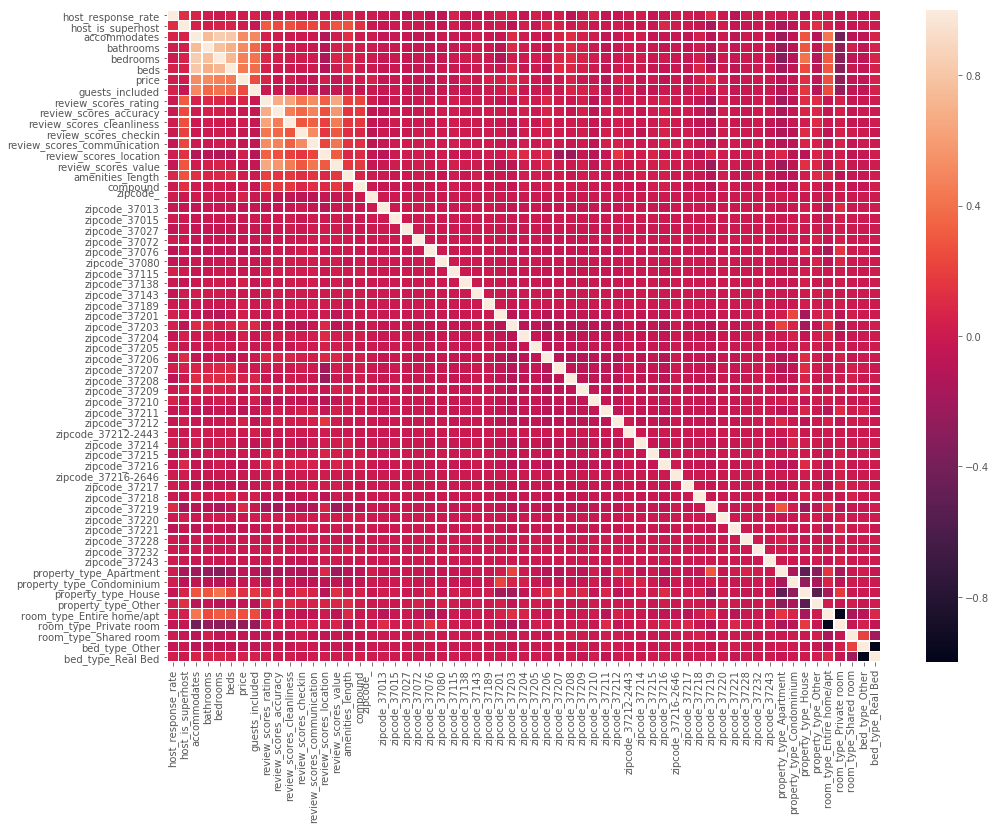

In [201]:
#Correlation Matrix
fig, ax = plt.subplots(figsize=(16,12))
corr = listings_final.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, linewidths=.5, ax=ax)
corr['price'].sort_values(ascending=False)

In [203]:
#Dropping rows with NAs
listings1=listings_final.dropna(subset = ['host_response_rate','review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value'])
listings1.isna().sum()

host_response_rate             0
host_is_superhost              0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
price                          0
guests_included                0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
amenities_length               0
compound                       0
zipcode_\n                     0
zipcode_37013                  0
zipcode_37015                  0
zipcode_37027                  0
zipcode_37072                  0
zipcode_37076                  0
zipcode_37080                  0
zipcode_37115                  0
zipcode_37138                  0
zipcode_37143                  0
zipcode_37189                  0
zipcode_37201                  0
zipcode_37203                  0
          

## Modelling

### Linear Regression

In [251]:
#Creating Training / Test splits

target_name = 'price'
X = listings1.drop('price', axis=1)
y=listings1[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=243)

In [252]:
#OLS Regression
Xp = X_train #Dependent variable
yp = y_train #Target outcome is price
Xp = sm.add_constant(Xp) 
ols_model = sm.OLS(yr, Xp.astype(float)).fit()

ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     50.47
Date:                Fri, 21 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:58:59   Log-Likelihood:                -27454.
No. Observations:                4306   AIC:                         5.502e+04
Df Residuals:                    4249   BIC:                         5.539e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -72.6398     37.630     -1.930      0.054    -146.415       1.135
host_response_rate            -11.9376      5.442     -2.193      0.028     -22.608      -1.267
host_is_superhost               2.8887      4.973      0.581      0.561      -6.861      12.639
accommodates                   13.6638      1.610      8.486      0.000      10.507      16.821
bathrooms                      49.2756      4.044     12.185      0.000      41.347      57.204
bedrooms                       16.4274      3.956      4.153      0.000       8.672      24.183
beds                            0.4638      1.580      0.294      0.769      -2.633       3.561
guests_included                -1.5987      0.924     -1.730      0.084      -3.410       0.213
review_scores_rating            5.0156      0.783      6.402      0.000       3.480       6.552
review_scores_accuracy        -20.8118      5.789     -3.595      0.000     -32.161      -9.463
review_scores_cleanliness       0.9030      4.766      0.189      0.850      -8.440      10.246
review_scores_checkin          -1.9020      6.616     -0.287      0.774     -14.873      11.069
review_scores_communication   -13.3425      7.076     -1.886      0.059     -27.214       0.529
review_scores_location         25.6155      4.214      6.078      0.000      17.354      33.877
review_scores_value           -26.7747      4.768     -5.616      0.000     -36.122     -17.427
amenities_length               -0.0293      0.014     -2.154      0.031      -0.056      -0.003
compound                       12.5206      8.571      1.461      0.144      -4.284      29.325
zipcode_
                     688.8822    147.306      4.677      0.000     400.086     977.679
zipcode_37013                 -19.7594     33.270     -0.594      0.553     -84.986      45.467
zipcode_37015                  60.6191    145.902      0.415      0.678    -225.426     346.664
zipcode_37027                 -29.2730     52.667     -0.556      0.578    -132.527      73.981
zipcode_37072                 -31.9909     41.707     -0.767      0.443    -113.758      49.776
zipcode_37076                 -45.6917     33.059     -1.382      0.167    -110.504      19.121
zipcode_37080                  23.3720     53.001      0.441      0.659     -80.537     127.281
zipcode_37115                 -34.9726     34.023     -1.028      0.304    -101.676      31.731
zipcode_37138                 128.4644     43.813      2.932      0.003      42.567     214.362
zipcode_37143                 -91.0457     76.511     -1.190      0.234    -241.047      58.955
zipcode_37189                 359.7372     69.424      5.182      0.000     223.631     495.844
zipcode_37201                  84.9594     29.342      2.895      0.004      27.433     142.486
zipcode_372

In [253]:
#Using OLS regression from sklearn
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

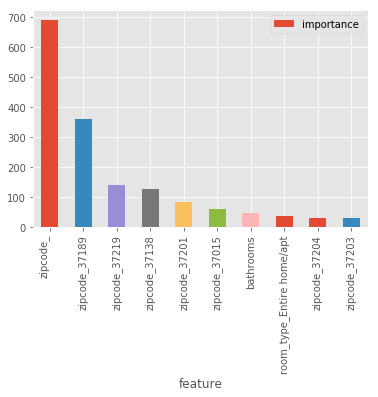

In [254]:
#Checking for features with most importance
ols_coefficients = pd.DataFrame({'feature': X_train.columns, 'importance': lm.coef_})
ols_coefficients.sort_values('importance', ascending=False)[:10].plot(x='feature', y='importance', kind='bar')



In [227]:
#OLS mean squared error on test dataset 
ols_y_predict = lm.predict(X_test)
ols_mse = np.sqrt(metrics.mean_squared_error(y_test, ols_y_predict))
ols_mse


181.5949677637162

In [238]:
ols_r2 = metrics.r2_score(y_test, ols_y_predict)
ols_r2

0.24619143080293515

### Decision Tree Modeling

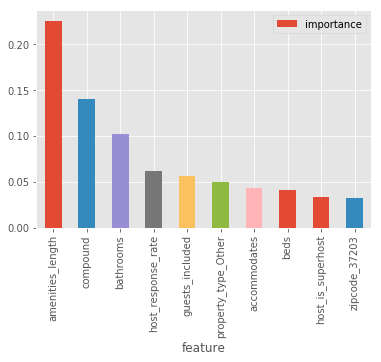

In [210]:
#Creating decision tree model
dtree = tree.DecisionTreeClassifier(
    class_weight="balanced",
    min_weight_fraction_leaf=0.01,)
dtree = dtree.fit(X_train,y_train)

#Checking for important features
importances = dtree.feature_importances_
feat_names = X_train.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar')

In [229]:
#Decision Tree mean squared error on test dataset
dtree_y_predict = dtree.predict(X_test)
dtree_mse = np.sqrt(metrics.mean_squared_error(y_test, dtree_y_predict))
dtree_mse

219.20719590570494

In [239]:
dtree_r2 = metrics.r2_score(y_test, dtree_y_predict)
dtree_r2

-0.09840642455473425

### Random Forest Modeling

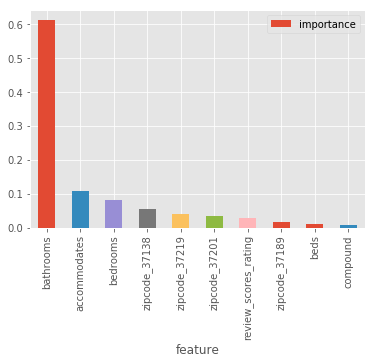

In [212]:
#Creating random forest model
rf = RandomForestRegressor(max_depth=3, random_state=0)
rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_
rf_result = pd.DataFrame({'feature': feat_names, 'importance': rf_importances})
rf_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar')

In [213]:
#Get Random Forest mean squared error on test dataset
rf_y_predict = rf.predict(X_test)
rf_mse = np.sqrt(metrics.mean_squared_error(y_test, rf_y_predict))
rf_mse

184.49530715539314

In [240]:
rf_r2 = metrics.r2_score(y_test, rf_y_predict)
rf_r2

0.22192027464735742

### Model Evaluation

In [242]:
print("OLS MSE",ols_mse)
print("Decision Tree MSE:", dtree_mse)
print("Random Forest MSE:", rf_mse)

OLS MSE 181.5949677637162
Decision Tree MSE: 219.20719590570494
Random Forest MSE: 184.49530715539314


In [243]:
print("OLS R^2",ols_r2)
print("Decision Tree R^2:", dtree_r2)
print("Random Forest R^2:", rf_r2)


OLS R^2 0.24619143080293515
Decision Tree R^2: -0.09840642455473425
Random Forest R^2: 0.22192027464735742
